In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
bestsellers_data = pd.read_csv("bestsellers_with_categories.csv")

In [3]:
# Display data
bestsellers_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# Basic statistics
bestsellers_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
# Derived columns for non fiction and fiction books
bestsellers_data['Non Fiction'] = bestsellers_data['Genre'].apply(lambda x: 1 if x == 'Non Fiction' else 0)
bestsellers_data['Fiction'] = bestsellers_data['Genre'].apply(lambda x: 1 if x == 'Fiction' else 0)

In [6]:
# Group Non Fiction and Fiction by year to show genre trend over year
genre_trends = bestsellers_data[['Year','Non Fiction', 'Fiction']].groupby(by=['Year']).sum()
genre_trends

,Non Fiction,Fiction
Year,,
2009,26,24
2010,30,20
2011,29,21
2012,29,21
2013,26,24
2014,21,29
2015,33,17
2016,31,19
2017,26,24


<AxesSubplot:title={'center':'Genre Trends of Amazon Bestselling Books Over Year'}, xlabel='Year'>

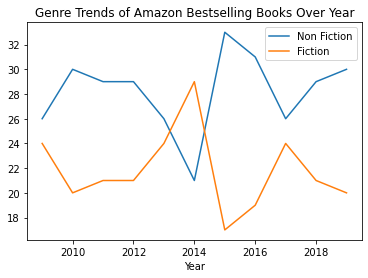

In [7]:
genre_trends.plot(kind='line', title='Genre Trends of Amazon Bestselling Books Over Year', label='Year')

## Genre Trends
Non Fiction Books made up the majority of Amazon's annual 50 bestselling books from 2009 to 2019, with an exception of year 2014. 

In [8]:
bestsellers_data['Name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The 5 Love Languages: The Secret to Love that Lasts                                   5
Wonder                                                                                5
To Kill a Mockingbird                                                                 5
Name: Name, dtype: int64

## Most Popular Books
These were the 10 books that became bestselling for the most part of 2009-2019 period.

In [18]:
bestsellers_data['Accumulated Rating'] = bestsellers_data['Reviews'] * bestsellers_data['User Rating']
rating_sum = bestsellers_data[['Genre', 'Reviews', 'Accumulated Rating']].groupby(['Genre']).sum()
rating_sum['Rating'] = rating_sum['Accumulated Rating'] / rating_sum['Reviews']
rating_sum[['Rating', 'Reviews']]

,Rating,Reviews
Genre,,
Fiction,4.592745,3764110
Non Fiction,4.651779,2810195


## Overall Rating of Books by Genre
Bestselling Non Fiction books on average were rated 4.65 while Fiction books on average were rated 4.59.